# 1. 데이터 임포트

In [5]:
kospi_raw = pd.read_csv('./datas/revenue_kospi.csv', encoding='euc-kr')
kospi_raw.head()

,산업별(1),수익현황별(1),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,전체,회사수 (개),587.0,578.0,614.0,644.0,646.0,648.0,650.0,6.240000e+02,6.600000e+02,6.940000e+02,6.820000e+02,6.840000e+02,6.830000e+02,6.150000e+02,6.270000e+02,6.710000e+02
1,전체,매출액 (백만원),480366079.0,577965261.0,605563958.0,647281451.0,686071414.0,870288726.0,875869605.0,1.022433e+09,1.125668e+09,1.183015e+09,1.175564e+09,1.140034e+09,1.110981e+09,1.079513e+09,1.154001e+09,1.177344e+09
2,전체,영업이익 (백만원),40368099.0,56520330.0,46518847.0,43284526.0,47603487.0,52373663.0,53415348.0,7.542867e+07,6.325517e+07,6.178398e+07,6.416144e+07,5.746037e+07,6.305137e+07,6.893654e+07,9.925012e+07,5.386150e+07
3,전체,경상이익 (백만원),33303057.0,62890439.0,53053242.0,51255223.0,58002926.0,34352142.0,55280686.0,8.419106e+07,6.146425e+07,6.028074e+07,5.430552e+07,5.403192e+07,7.265072e+07,6.573003e+07,9.977413e+07,4.516072e+07
4,전체,당기순이익 (백만원),27757281.0,48369122.0,42808451.0,39848330.0,45611312.0,27924993.0,44134219.0,6.994212e+07,4.935602e+07,5.008272e+07,4.370113e+07,4.389331e+07,5.718430e+07,5.155235e+07,8.207258e+07,3.363780e+07


# 2. 전처리

In [18]:
import missingno as msno

In [178]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
%matplotlib inline

<AxesSubplot:>

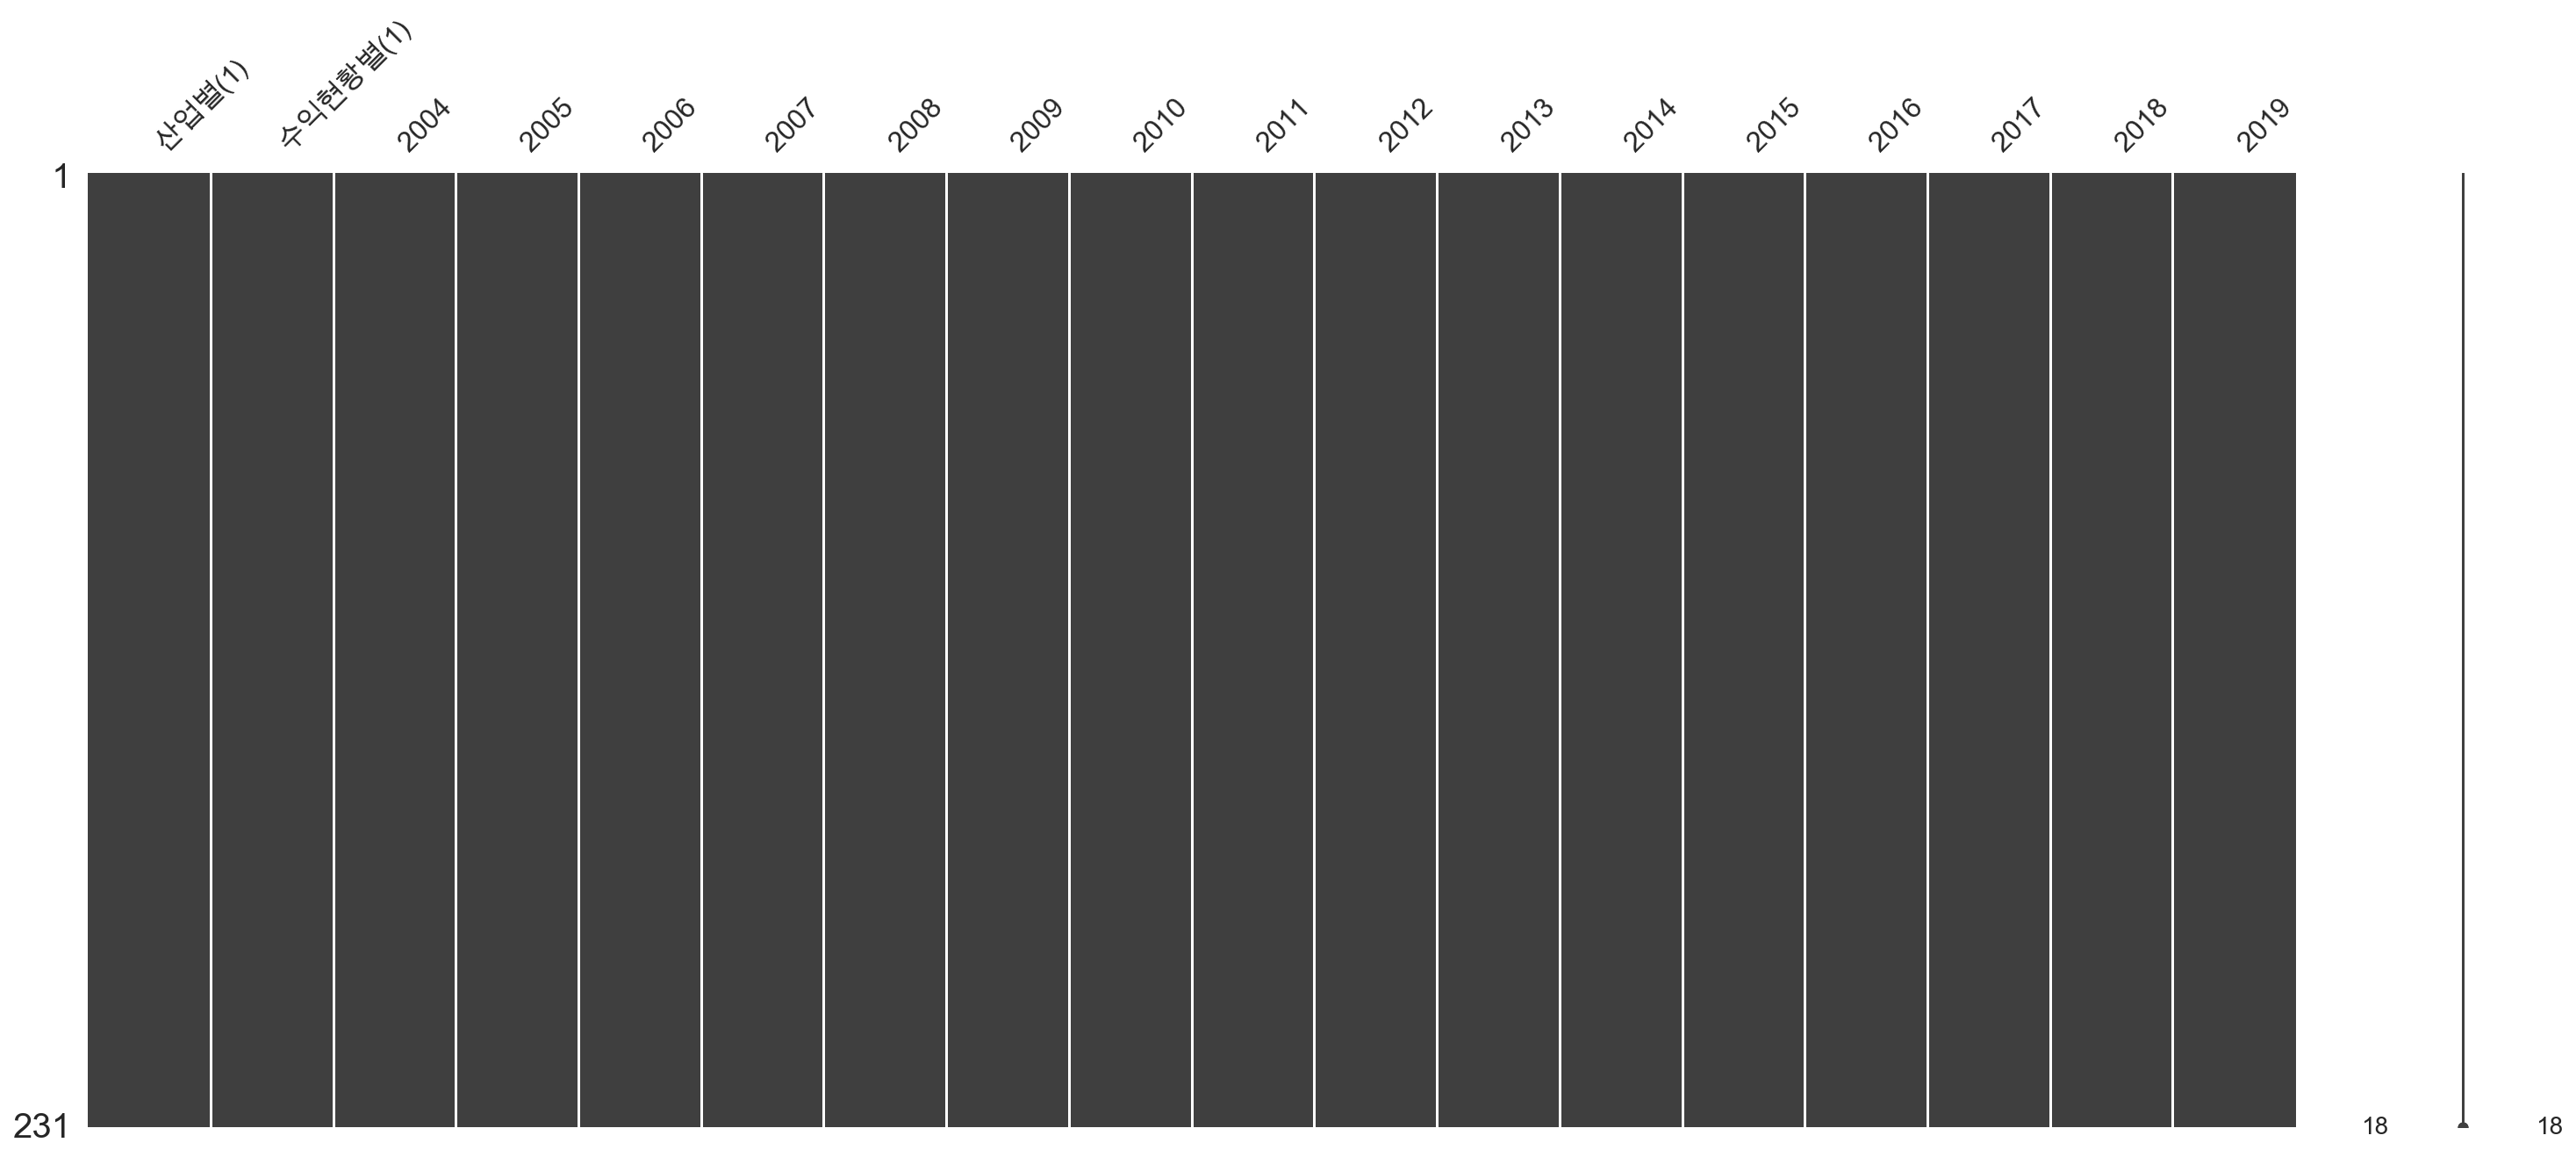

In [21]:
msno.matrix(kospi_raw)

In [22]:
kospi_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   산업별(1)    231 non-null    object 
 1   수익현황별(1)  231 non-null    object 
 2   2004      231 non-null    float64
 3   2005      231 non-null    float64
 4   2006      231 non-null    float64
 5   2007      231 non-null    float64
 6   2008      231 non-null    float64
 7   2009      231 non-null    float64
 8   2010      231 non-null    float64
 9   2011      231 non-null    float64
 10  2012      231 non-null    float64
 11  2013      231 non-null    float64
 12  2014      231 non-null    float64
 13  2015      231 non-null    float64
 14  2016      231 non-null    float64
 15  2017      231 non-null    float64
 16  2018      231 non-null    float64
 17  2019      231 non-null    float64
dtypes: float64(16), object(2)
memory usage: 32.6+ KB


In [26]:
kospi_raw['수익현황별(1)'].unique()

array(['회사수 (개)', '매출액 (백만원)', '영업이익 (백만원)', '경상이익 (백만원)', '당기순이익 (백만원)',
       '납입자본이익률 (%)', '자기자본이익률 (%)', '총자본경상이익률 (%)', '매출액경상이익률 (%)',
       '매출액이익률 (%)', '매출액증가율 (%)'], dtype=object)

In [128]:
kospi_raw_t = kospi_raw.T
kospi_raw_t.head()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
산업별(1),전체,전체,전체,전체,전체,전체,전체,전체,전체,전체,...,서비스업,서비스업,서비스업,서비스업,서비스업,서비스업,서비스업,서비스업,서비스업,서비스업
수익현황별(1),회사수 (개),매출액 (백만원),영업이익 (백만원),경상이익 (백만원),당기순이익 (백만원),납입자본이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),매출액경상이익률 (%),매출액이익률 (%),...,매출액 (백만원),영업이익 (백만원),경상이익 (백만원),당기순이익 (백만원),납입자본이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),매출액경상이익률 (%),매출액이익률 (%),매출액증가율 (%)
2004,587,480366079,40368099,33303057,27757281,51,10,6,6,5,...,4303211,566675,352320,253936,11,3,2,8,5,58
2005,578,5.77965e+08,5.65203e+07,6.28904e+07,4.83691e+07,86.01,15.48,10.56,10.88,8.37,...,7.36437e+06,1.95731e+06,1.91813e+06,1.55659e+06,72.74,14.84,13.28,26.05,21.14,71.14
2006,614,6.05564e+08,4.65188e+07,5.30532e+07,4.28085e+07,77.04,12.24,8.21,8.76,7.07,...,9.03437e+06,1.97399e+06,2.54318e+06,2.02904e+06,76.39,14.25,13.21,28.15,22.46,22.68


In [151]:
kospi_raw_t.index

Index(['산업별(1)', '수익현황별(1)', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [152]:
## index로 만들 row
kospi_raw_t.loc['수익현황별(1)'].unique()

array(['회사수 (개)', '매출액 (백만원)', '영업이익 (백만원)', '경상이익 (백만원)', '당기순이익 (백만원)',
       '납입자본이익률 (%)', '자기자본이익률 (%)', '총자본경상이익률 (%)', '매출액경상이익률 (%)',
       '매출액이익률 (%)', '매출액증가율 (%)'], dtype=object)

In [153]:
kospi_raw_t.loc['산업별(1)',0]

'전체'

In [146]:
## 산업별 데이터마다 df 만들기
kospi_raw_tmp = kospi_raw_t.iloc[:,0:11]
kospi_raw_tmp = kospi_raw_tmp.reset_index()
kospi_raw_tmp['분류'] = kospi_raw_t.loc['산업별(1)',0]
kospi_raw_tmp.columns = kospi_raw_tmp.loc[1]
kospi_raw_tmp.rename(columns={kospi_raw_tmp.columns[-1]:'산업별'}, inplace=True)
kospi_raw_tmp = kospi_raw_tmp.drop([0,1])
kospi_raw_tmp.head(3)

1,수익현황별(1),회사수 (개),매출액 (백만원),영업이익 (백만원),경상이익 (백만원),당기순이익 (백만원),납입자본이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),매출액경상이익률 (%),매출액이익률 (%),매출액증가율 (%),산업별
2,2004,5,691574,10755,799,-3325,-4,-1,0,0,0,1,"농업, 임업 및 어업"
3,2005,5,798101,23768,40286,28638,38.71,8.23,5.17,5.05,3.59,15.4,"농업, 임업 및 어업"
4,2006,5,767165,-11864,7197,1116,1.51,0.32,0.91,0.94,0.15,-3.88,"농업, 임업 및 어업"


### 전체 loop

In [102]:
df = pd.DataFrame(columns=kospi_raw_t.loc['수익현황별(1)'].unique())
df

,회사수 (개),매출액 (백만원),영업이익 (백만원),경상이익 (백만원),당기순이익 (백만원),납입자본이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),매출액경상이익률 (%),매출액이익률 (%),매출액증가율 (%)


In [147]:
df = pd.DataFrame(columns=kospi_raw_t.loc['수익현황별(1)'].unique())

for num in range(0,231,11):
    kospi_raw_tmp = kospi_raw_t.iloc[:,num:num+11]
    kospi_raw_tmp = kospi_raw_tmp.reset_index()
    kospi_raw_tmp['분류'] = kospi_raw_t.loc['산업별(1)',num]
    kospi_raw_tmp.columns = kospi_raw_tmp.loc[1]
    kospi_raw_tmp.rename(columns={kospi_raw_tmp.columns[-1]:'산업별'}, inplace=True)
    kospi_raw_tmp = kospi_raw_tmp.drop([0,1])
    df = df.append(kospi_raw_tmp)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 2 to 17
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   회사수 (개)       336 non-null    object
 1   매출액 (백만원)     336 non-null    object
 2   영업이익 (백만원)    336 non-null    object
 3   경상이익 (백만원)    336 non-null    object
 4   당기순이익 (백만원)   336 non-null    object
 5   납입자본이익률 (%)   336 non-null    object
 6   자기자본이익률 (%)   336 non-null    object
 7   총자본경상이익률 (%)  336 non-null    object
 8   매출액경상이익률 (%)  336 non-null    object
 9   매출액이익률 (%)    336 non-null    object
 10  매출액증가율 (%)    336 non-null    object
 11  수익현황별(1)      336 non-null    object
 12  산업별           336 non-null    object
dtypes: object(13)
memory usage: 36.8+ KB


In [154]:
df.head(2)

,회사수 (개),매출액 (백만원),영업이익 (백만원),경상이익 (백만원),당기순이익 (백만원),납입자본이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),매출액경상이익률 (%),매출액이익률 (%),매출액증가율 (%),수익현황별(1),산업별
2,587,480366079,40368099,33303057,27757281,51,10,6,6,5,-8,2004,전체
3,578,5.77965e+08,5.65203e+07,6.28904e+07,4.83691e+07,86.01,15.48,10.56,10.88,8.37,20.32,2005,전체


## 데이터 타입 변환
- 회사수, 매출액, 영업이익, 경상이익 : numeric data?
- 납입자본이익률, 자기자본이익률, 총자본경상이익률, 매출액경상이익률, 매출액이익률, 매출액증가율 : numeric data?
- 

In [155]:
df.columns

Index(['회사수 (개)', '매출액 (백만원)', '영업이익 (백만원)', '경상이익 (백만원)', '당기순이익 (백만원)',
       '납입자본이익률 (%)', '자기자본이익률 (%)', '총자본경상이익률 (%)', '매출액경상이익률 (%)',
       '매출액이익률 (%)', '매출액증가율 (%)', '수익현황별(1)', '산업별'],
      dtype='object')

In [162]:
df['회사수 (개)'] = df['회사수 (개)'].astype('int')
df['매출액 (백만원)'] = df['매출액 (백만원)'].astype('int')
df['영업이익 (백만원)'] = df['영업이익 (백만원)'].astype('int')
df['경상이익 (백만원)'] = df['경상이익 (백만원)'].astype('int')
df['당기순이익 (백만원)'] = df['당기순이익 (백만원)'].astype('int')
df['납입자본이익률 (%)'] = df['납입자본이익률 (%)'].astype('float')
df['자기자본이익률 (%)'] = df['자기자본이익률 (%)'].astype('float')
df['총자본경상이익률 (%)'] = df['총자본경상이익률 (%)'].astype('float')
df['매출액경상이익률 (%)'] = df['매출액경상이익률 (%)'].astype('float')
df['매출액이익률 (%)'] = df['매출액이익률 (%)'].astype('float')
df['매출액증가율 (%)'] = df['매출액증가율 (%)'].astype('float')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 2 to 17
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   회사수 (개)       336 non-null    int64  
 1   매출액 (백만원)     336 non-null    int64  
 2   영업이익 (백만원)    336 non-null    int64  
 3   경상이익 (백만원)    336 non-null    int64  
 4   당기순이익 (백만원)   336 non-null    int64  
 5   납입자본이익률 (%)   336 non-null    float64
 6   자기자본이익률 (%)   336 non-null    float64
 7   총자본경상이익률 (%)  336 non-null    float64
 8   매출액경상이익률 (%)  336 non-null    float64
 9   매출액이익률 (%)    336 non-null    float64
 10  매출액증가율 (%)    336 non-null    float64
 11  수익현황별(1)      336 non-null    object 
 12  산업별           336 non-null    object 
dtypes: float64(6), int64(5), object(2)
memory usage: 36.8+ KB


In [166]:
## 어색한 컬럼네임 바꾸기
df.rename(columns={'수익현황별(1)':'년도'}, inplace=True)
df.columns

Index(['회사수 (개)', '매출액 (백만원)', '영업이익 (백만원)', '경상이익 (백만원)', '당기순이익 (백만원)',
       '납입자본이익률 (%)', '자기자본이익률 (%)', '총자본경상이익률 (%)', '매출액경상이익률 (%)',
       '매출액이익률 (%)', '매출액증가율 (%)', '년도', '산업별'],
      dtype='object')

## 년도 별 변화량 파악
- 우선적으로 각 업종의 feature가 시간에 따라 어떻게 변하는지 파악

In [167]:
df_count = df.pivot('년도','산업별','회사수 (개)')
df_count

산업별,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,...,음식료품,의료·정밀기기,의약품,전기가스,전기전자,전체,종이·목재,철강금속,통신업,화학
년도,,,,,,,,,,,,,,,,,,,,,
2004,37,1,40,11,5,22,24,34,38,16,...,38,6,36,10,68,587,24,39,3,83
2005,36,1,40,10,5,22,25,34,42,16,...,34,5,35,10,66,578,24,38,4,82
2006,37,1,40,11,5,23,52,33,43,17,...,35,6,35,10,67,614,24,40,4,83
2007,37,1,41,11,5,23,81,33,44,19,...,35,5,35,10,64,644,22,40,4,83
2008,38,1,35,10,5,22,94,33,44,19,...,31,5,35,11,64,646,23,39,4,83
2009,36,1,35,10,4,22,102,30,44,21,...,32,5,37,11,59,648,23,40,4,86
2010,36,1,37,9,4,22,107,30,45,20,...,34,4,35,10,59,650,23,43,3,83
2011,36,1,37,11,5,22,86,27,43,18,...,34,5,33,11,57,624,23,45,3,83
2012,34,1,40,12,5,22,89,27,48,20,...,35,5,37,11,59,660,24,45,3,88


In [173]:
df_count_detail = df_count.drop(columns='전체')

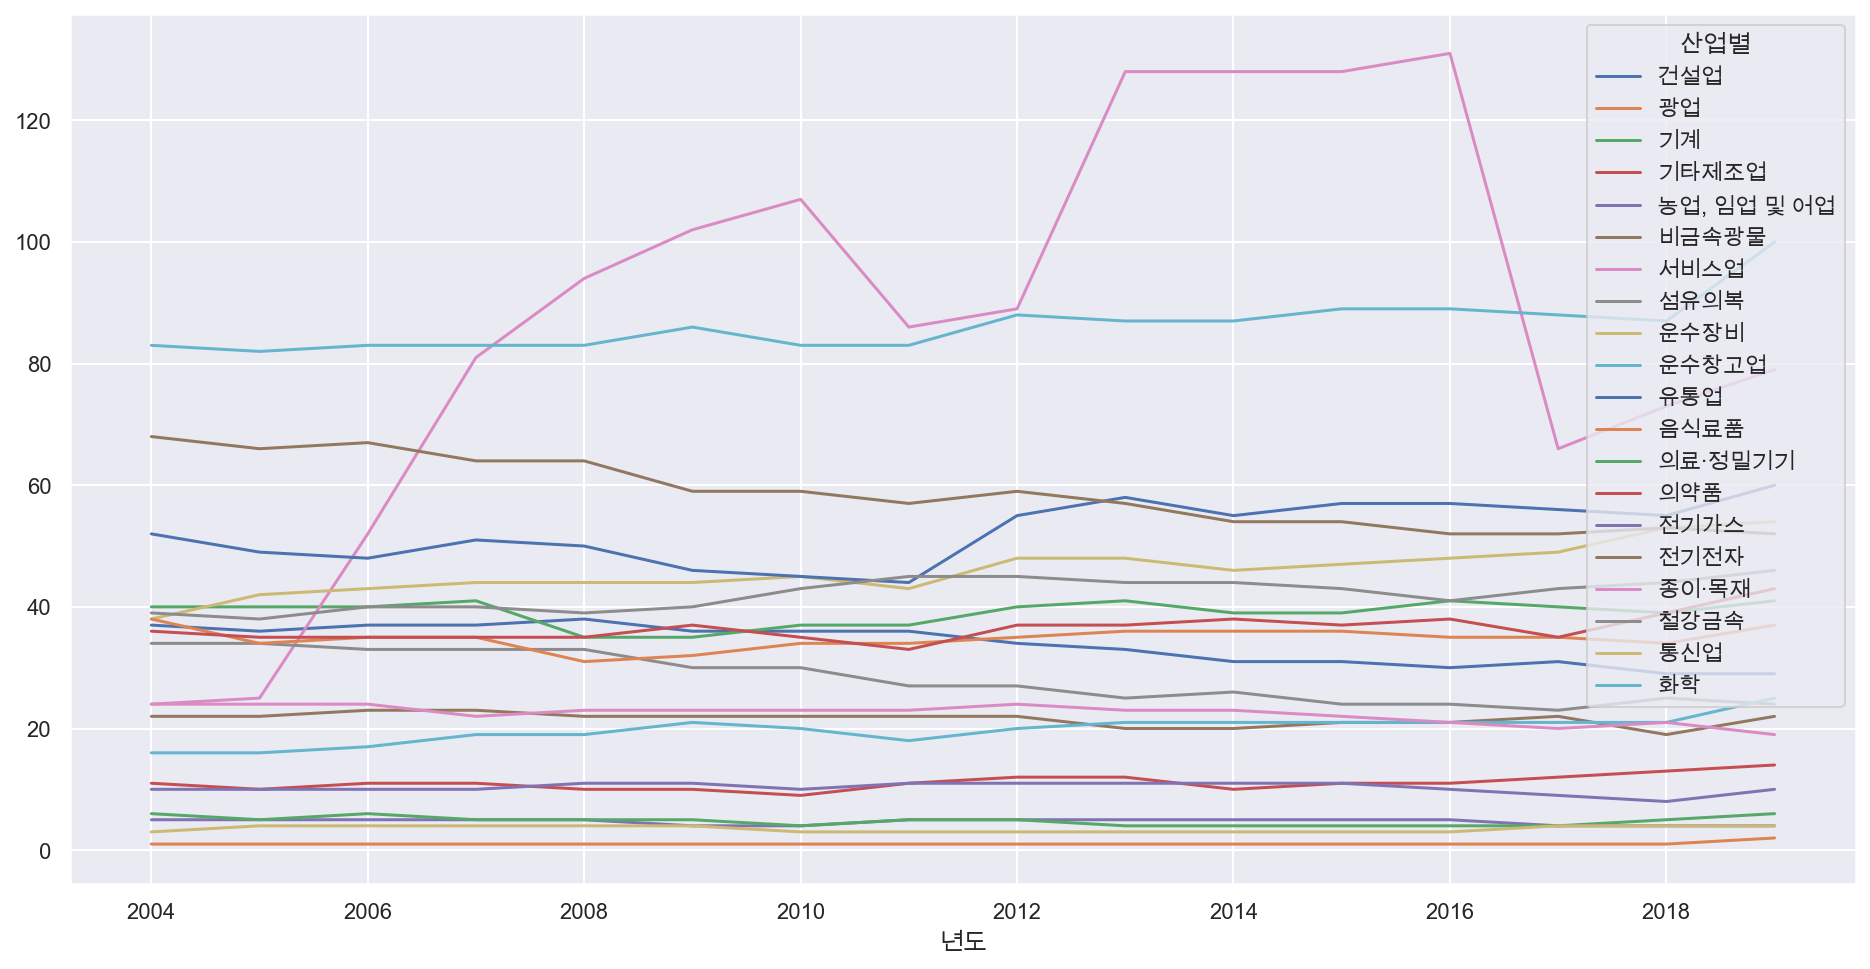

In [180]:
df_count_detail.plot(figsize=(16,8));

In [184]:
index_list = list(df.columns)[:-2]
index_list

['회사수 (개)',
 '매출액 (백만원)',
 '영업이익 (백만원)',
 '경상이익 (백만원)',
 '당기순이익 (백만원)',
 '납입자본이익률 (%)',
 '자기자본이익률 (%)',
 '총자본경상이익률 (%)',
 '매출액경상이익률 (%)',
 '매출액이익률 (%)',
 '매출액증가율 (%)']

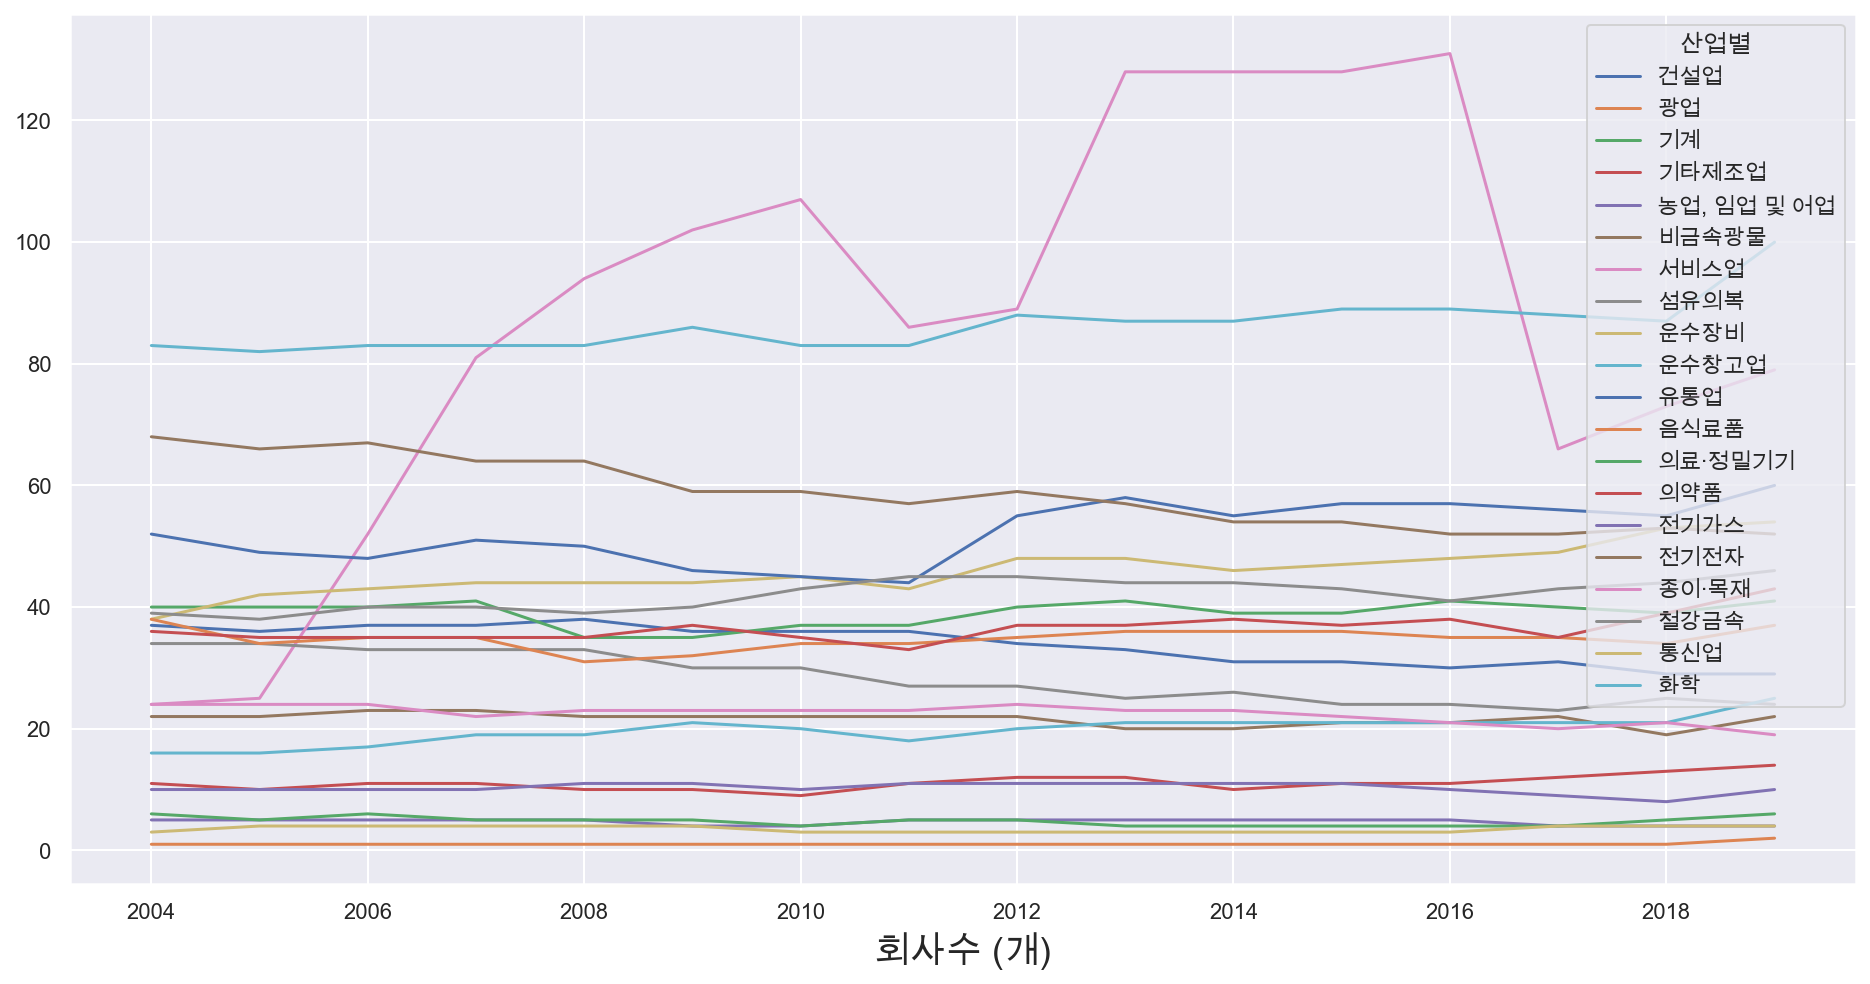

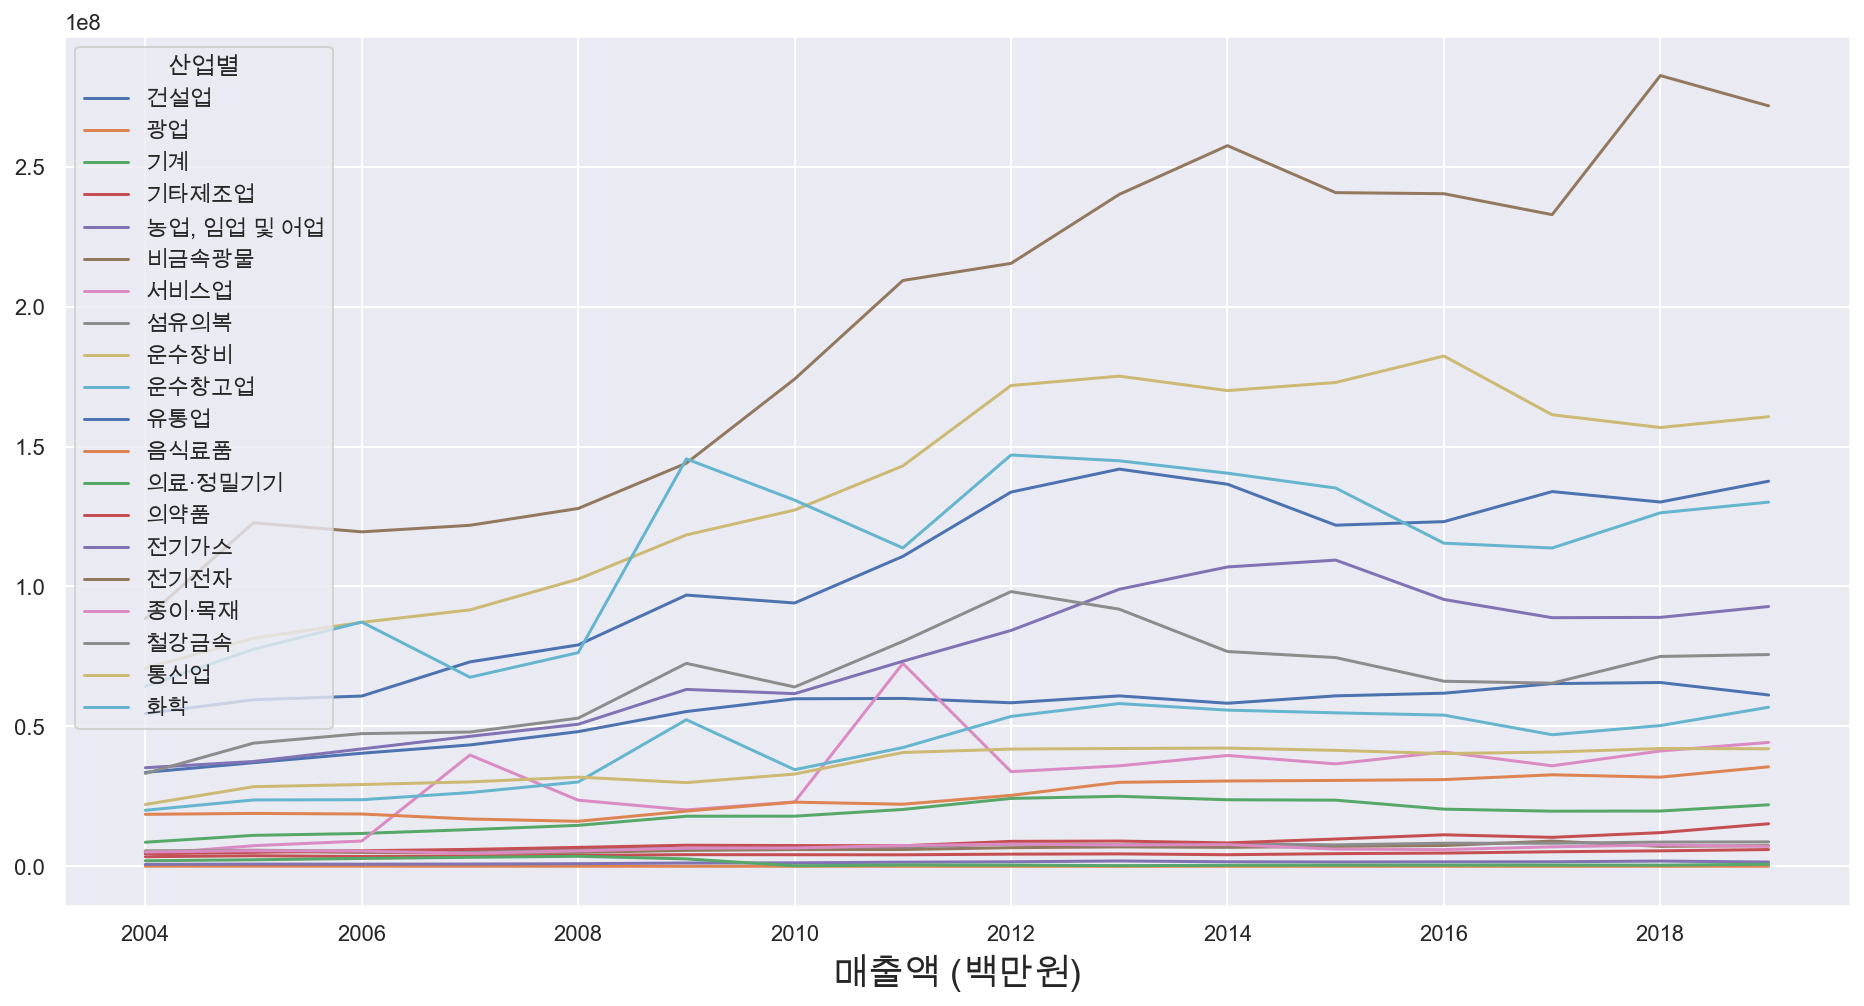

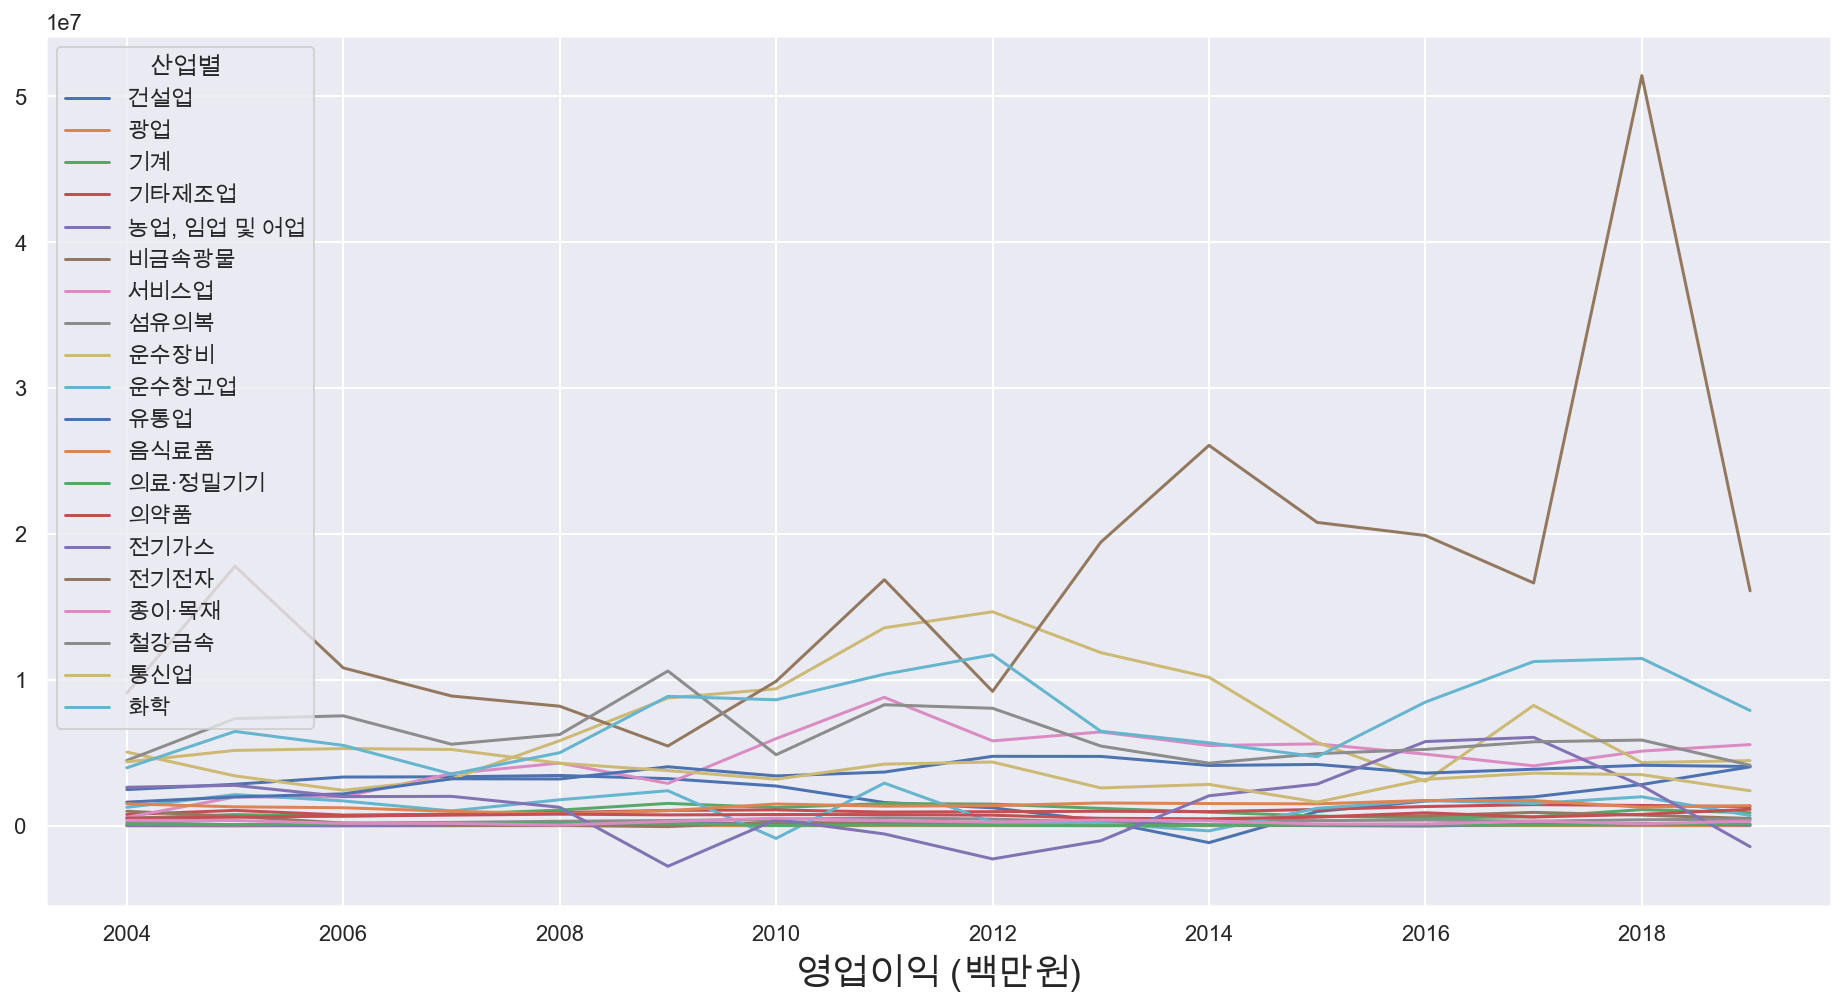

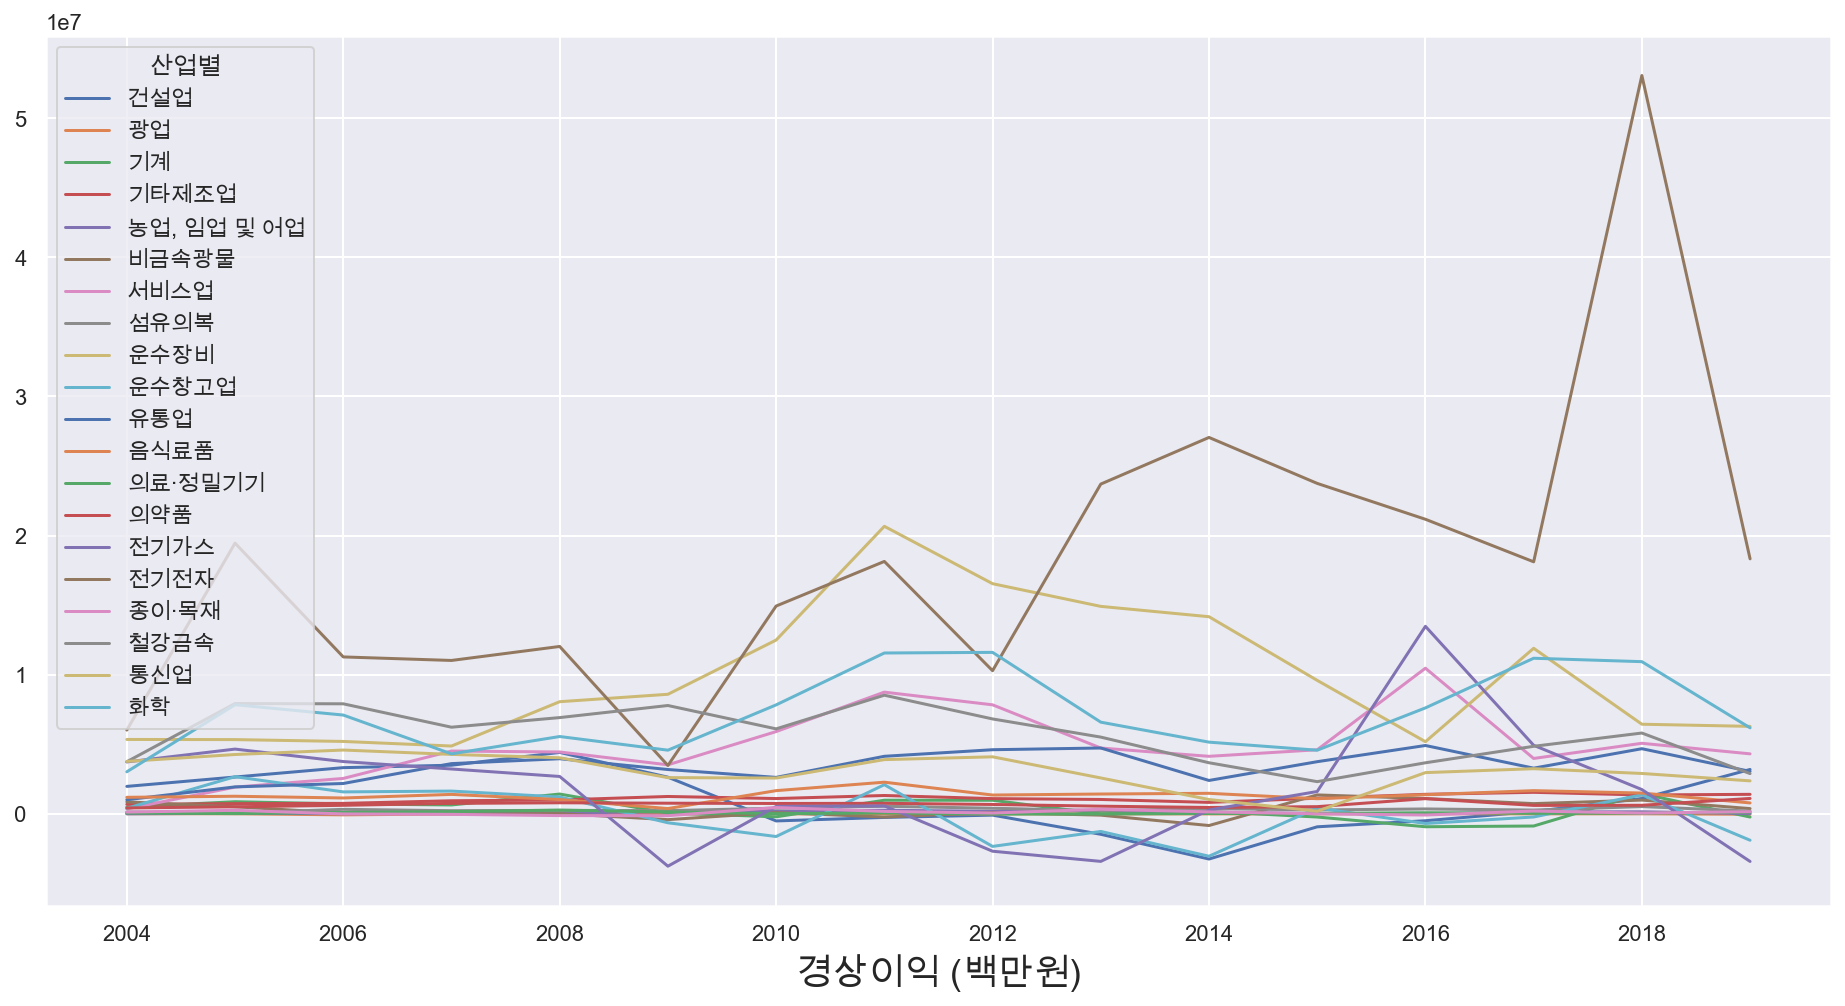

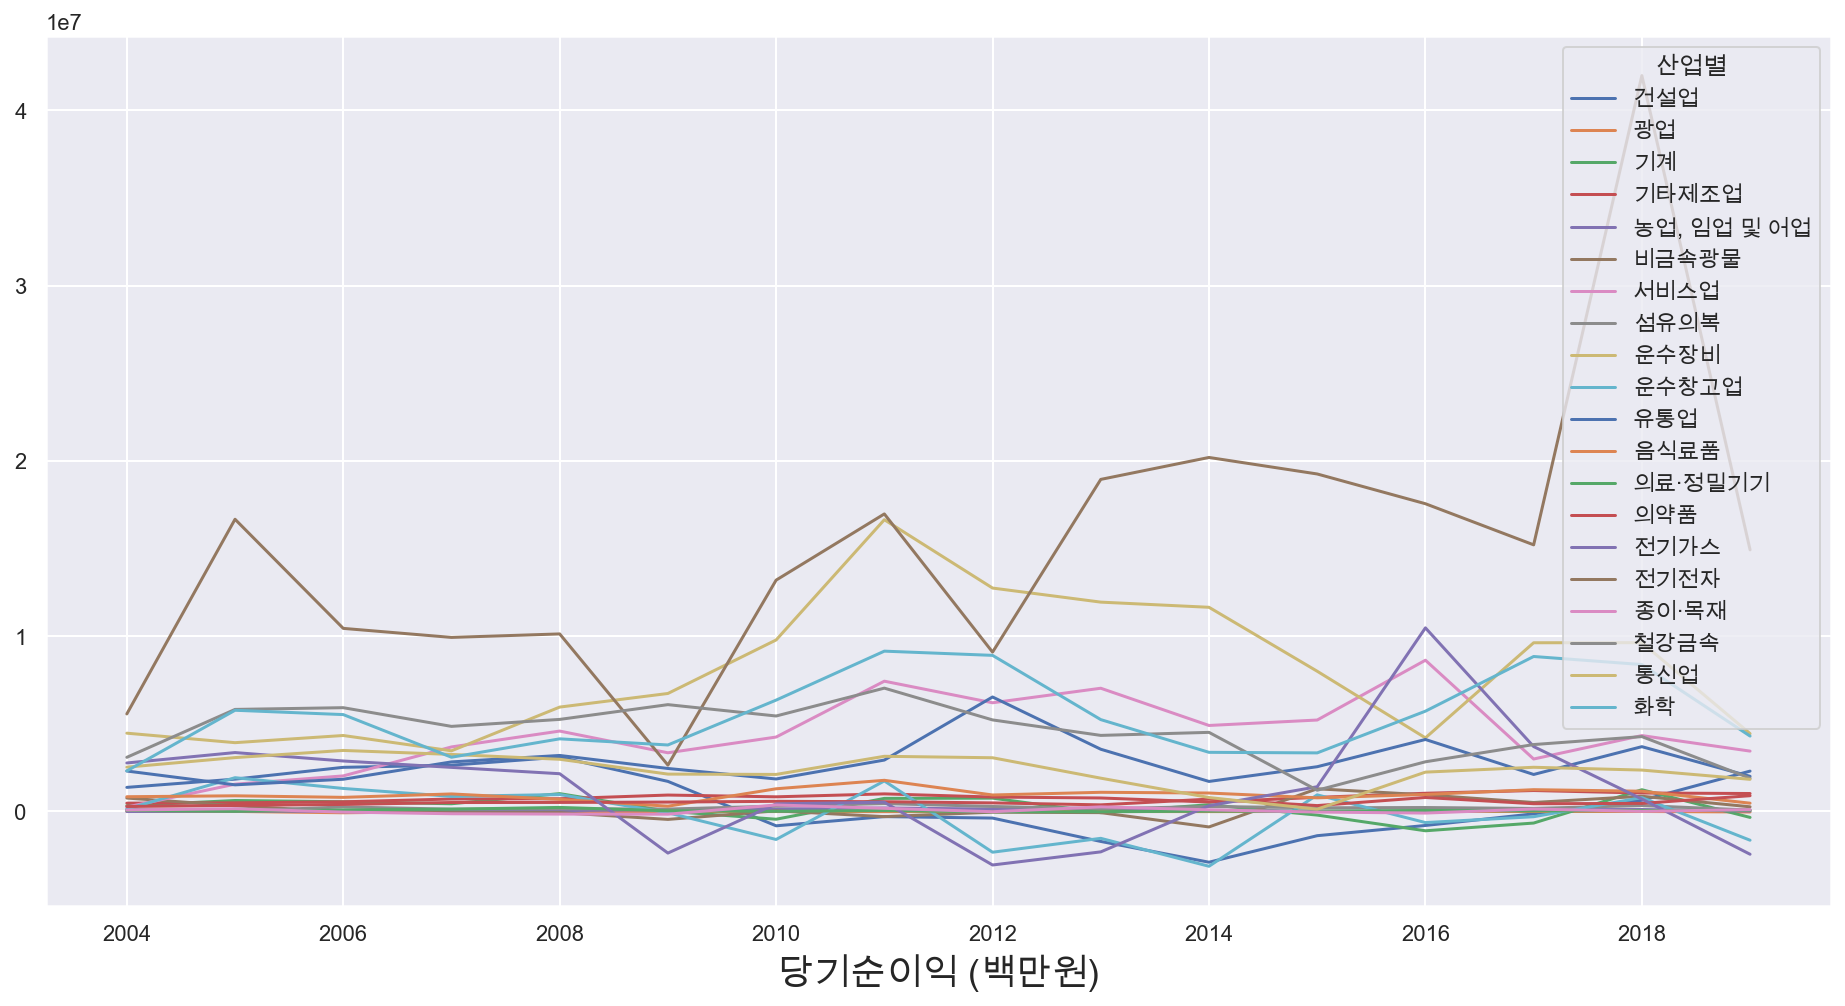

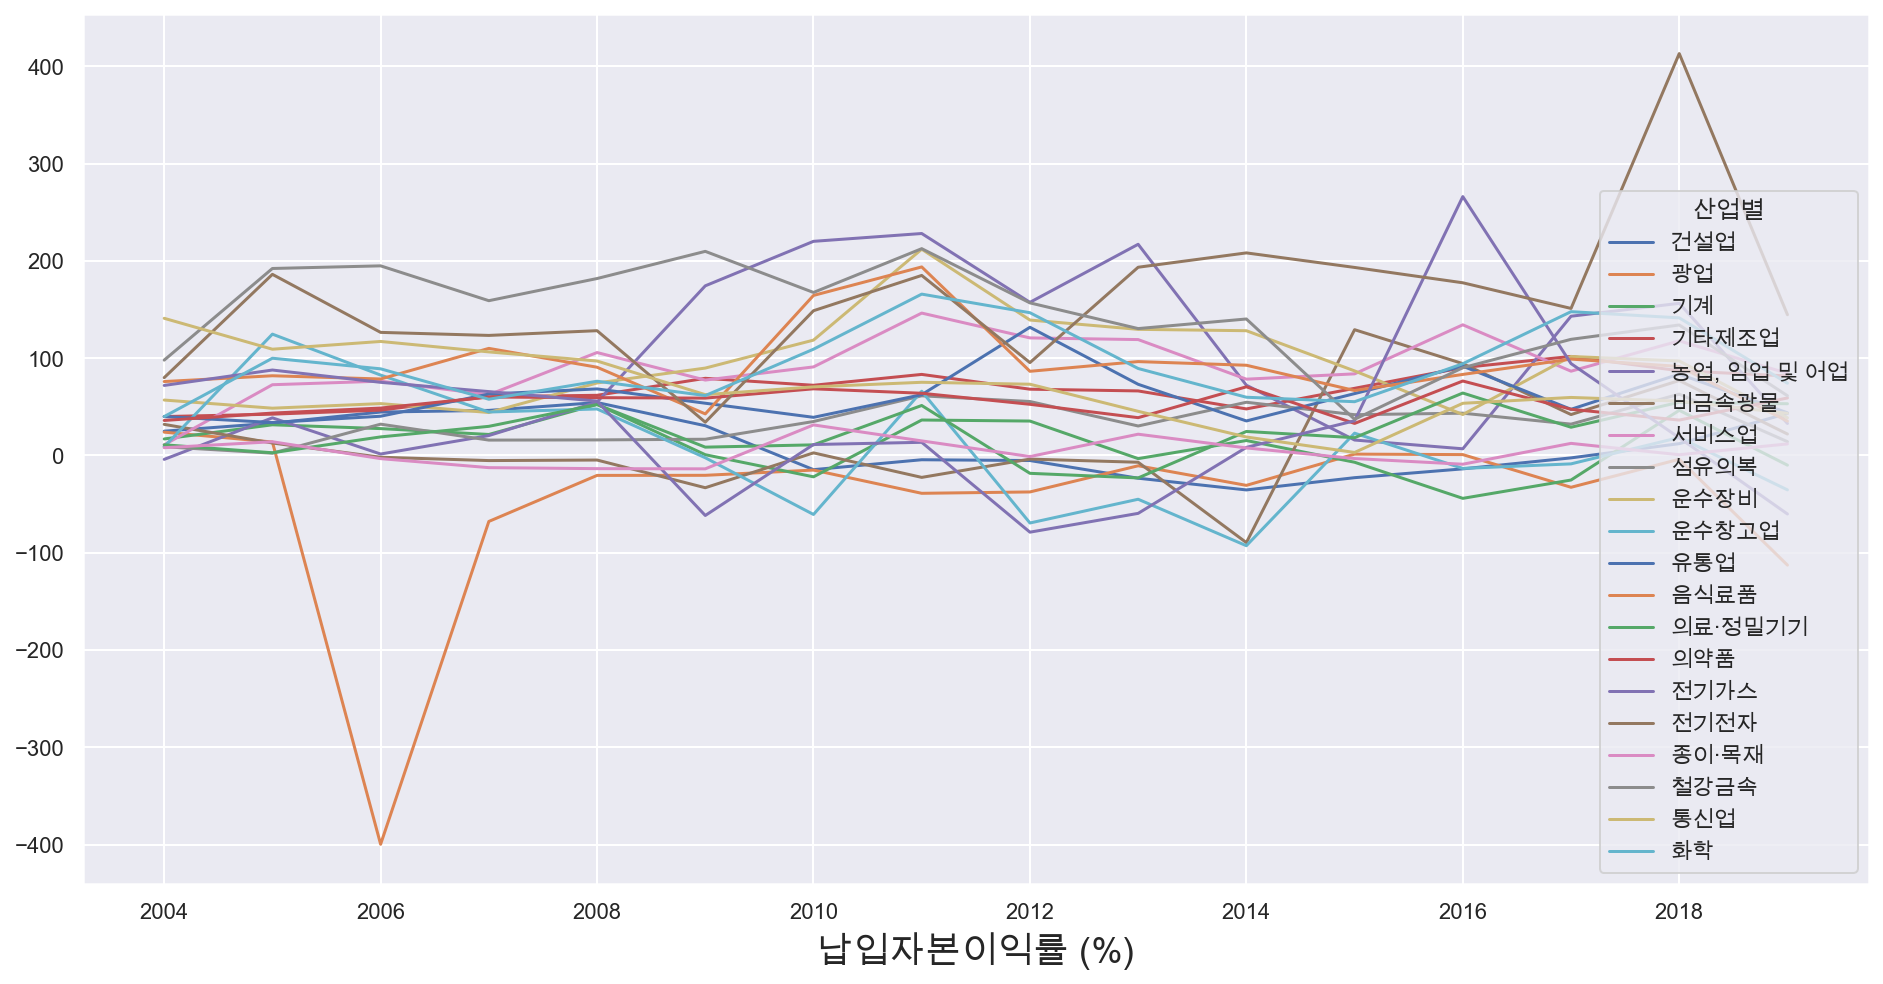

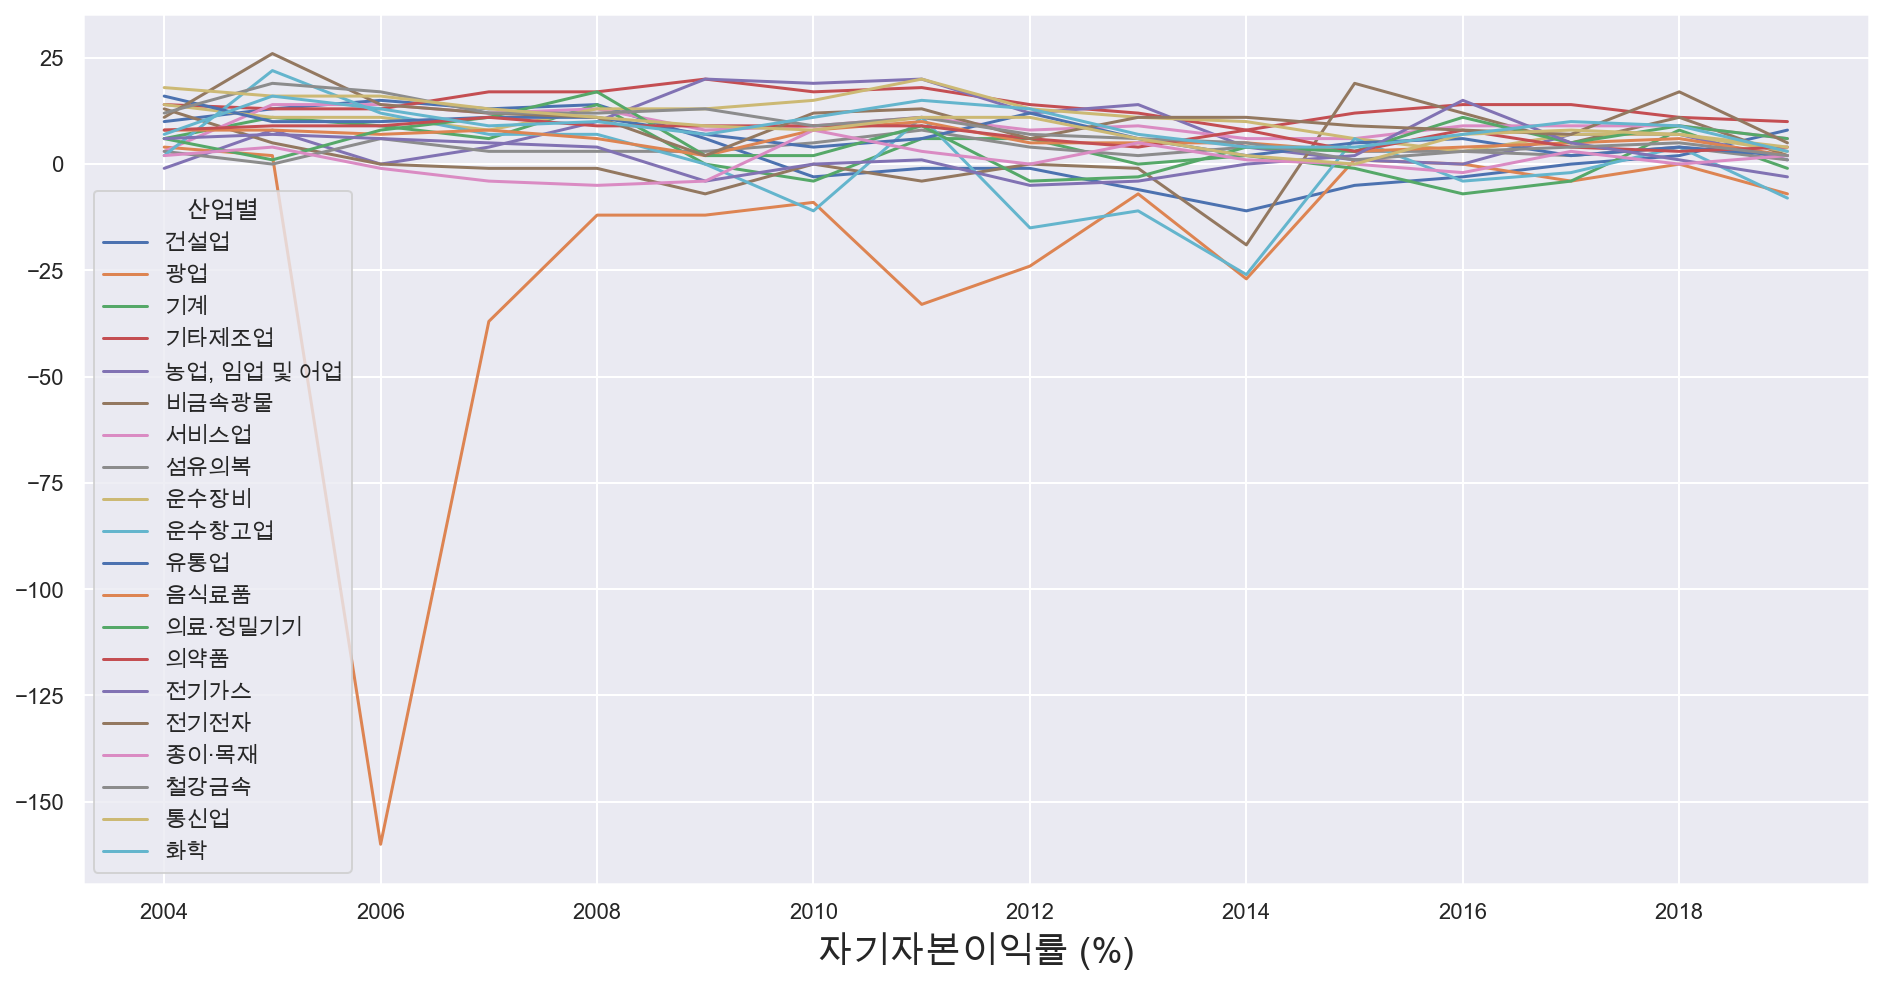

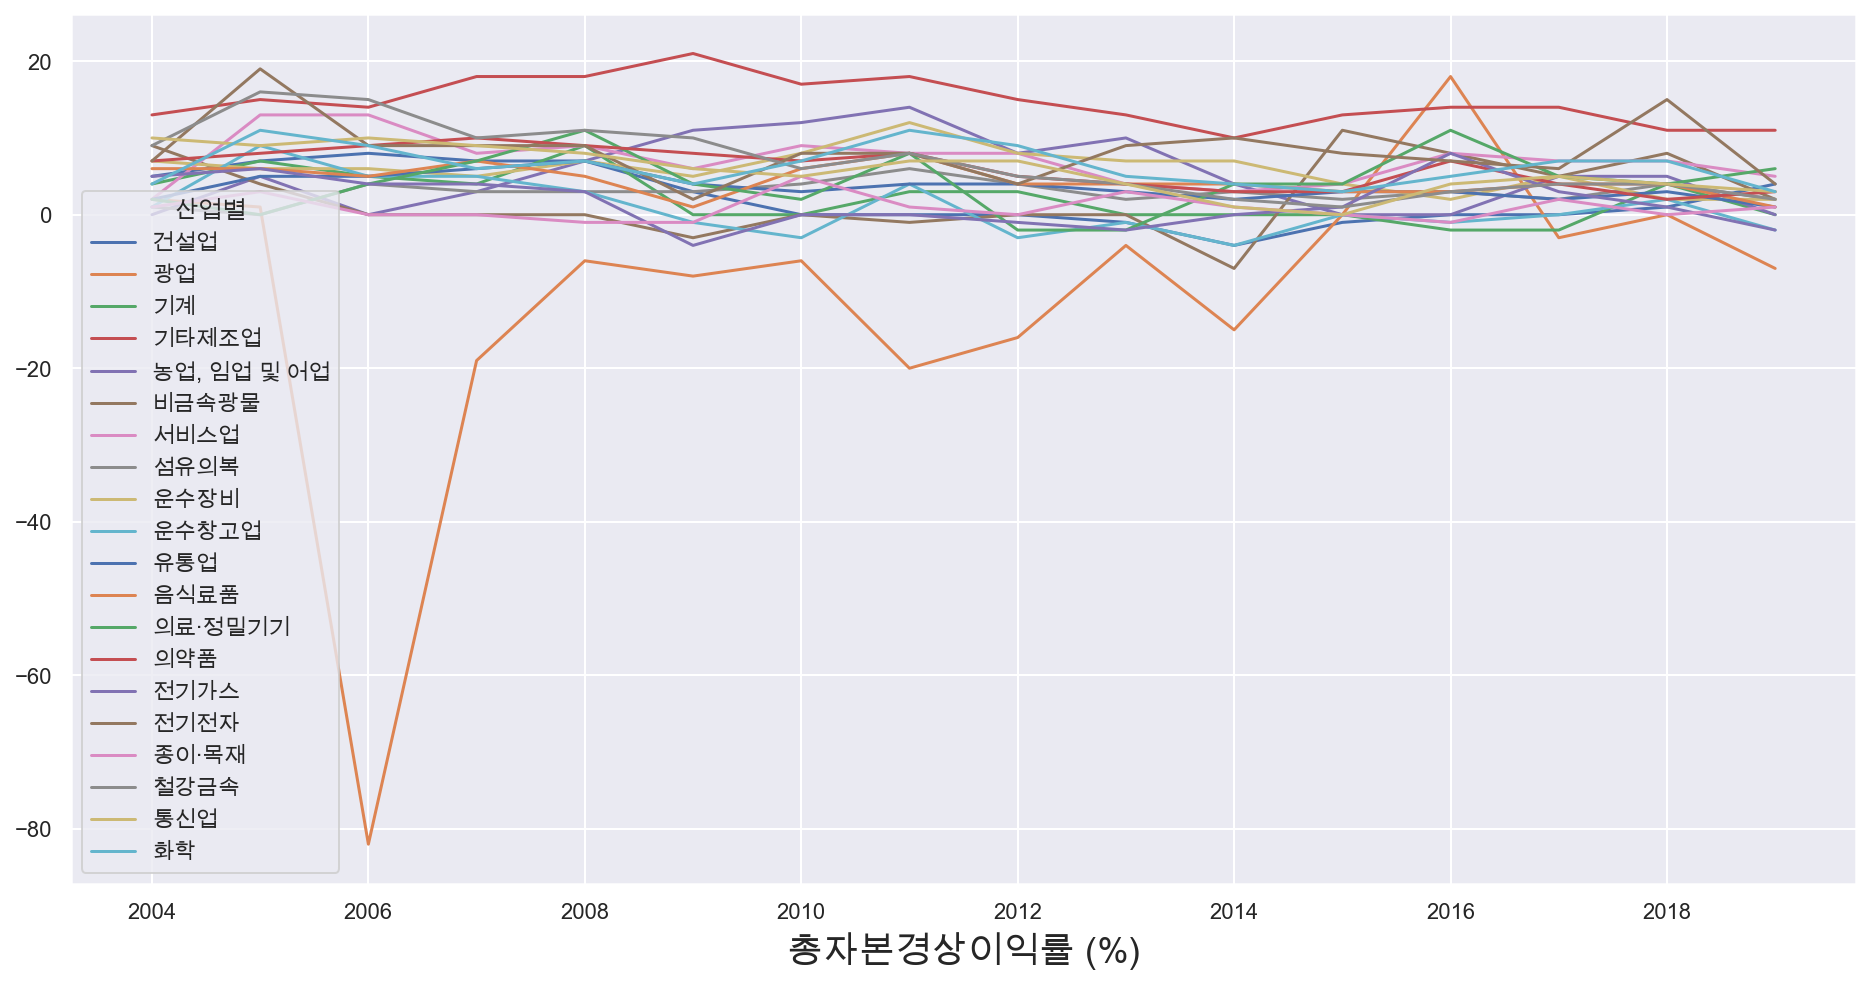

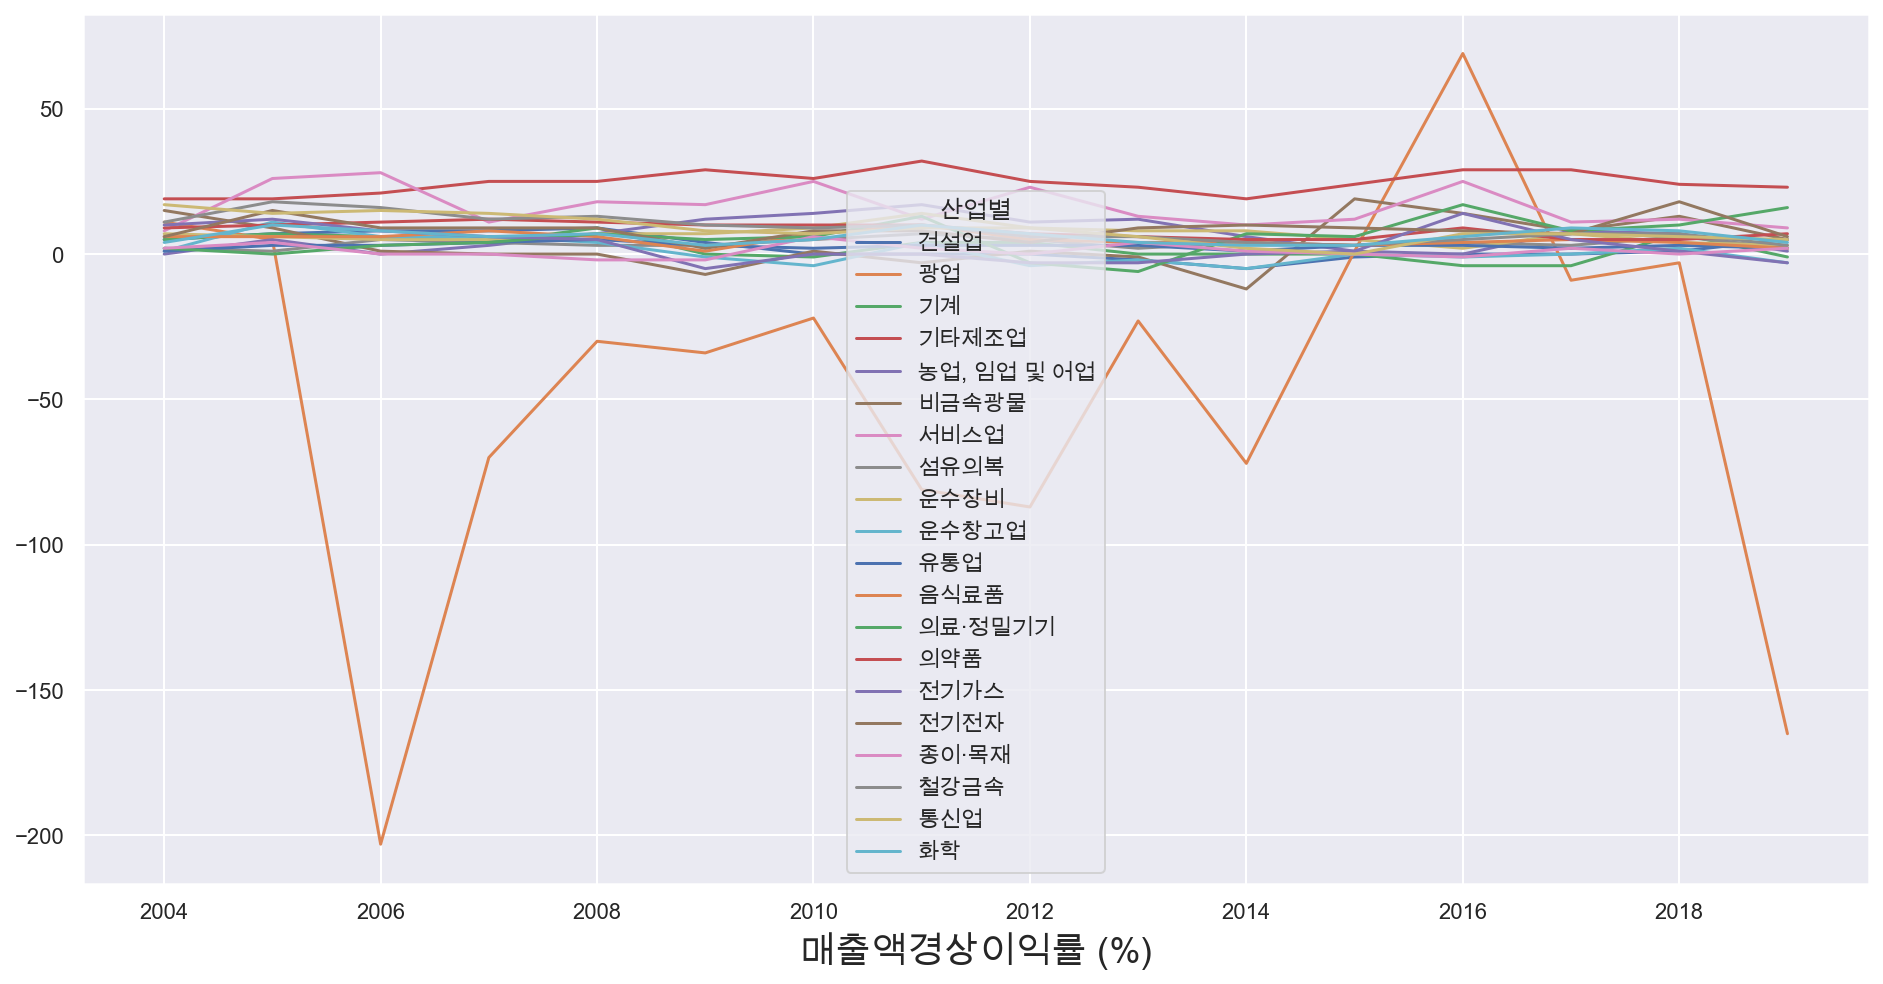

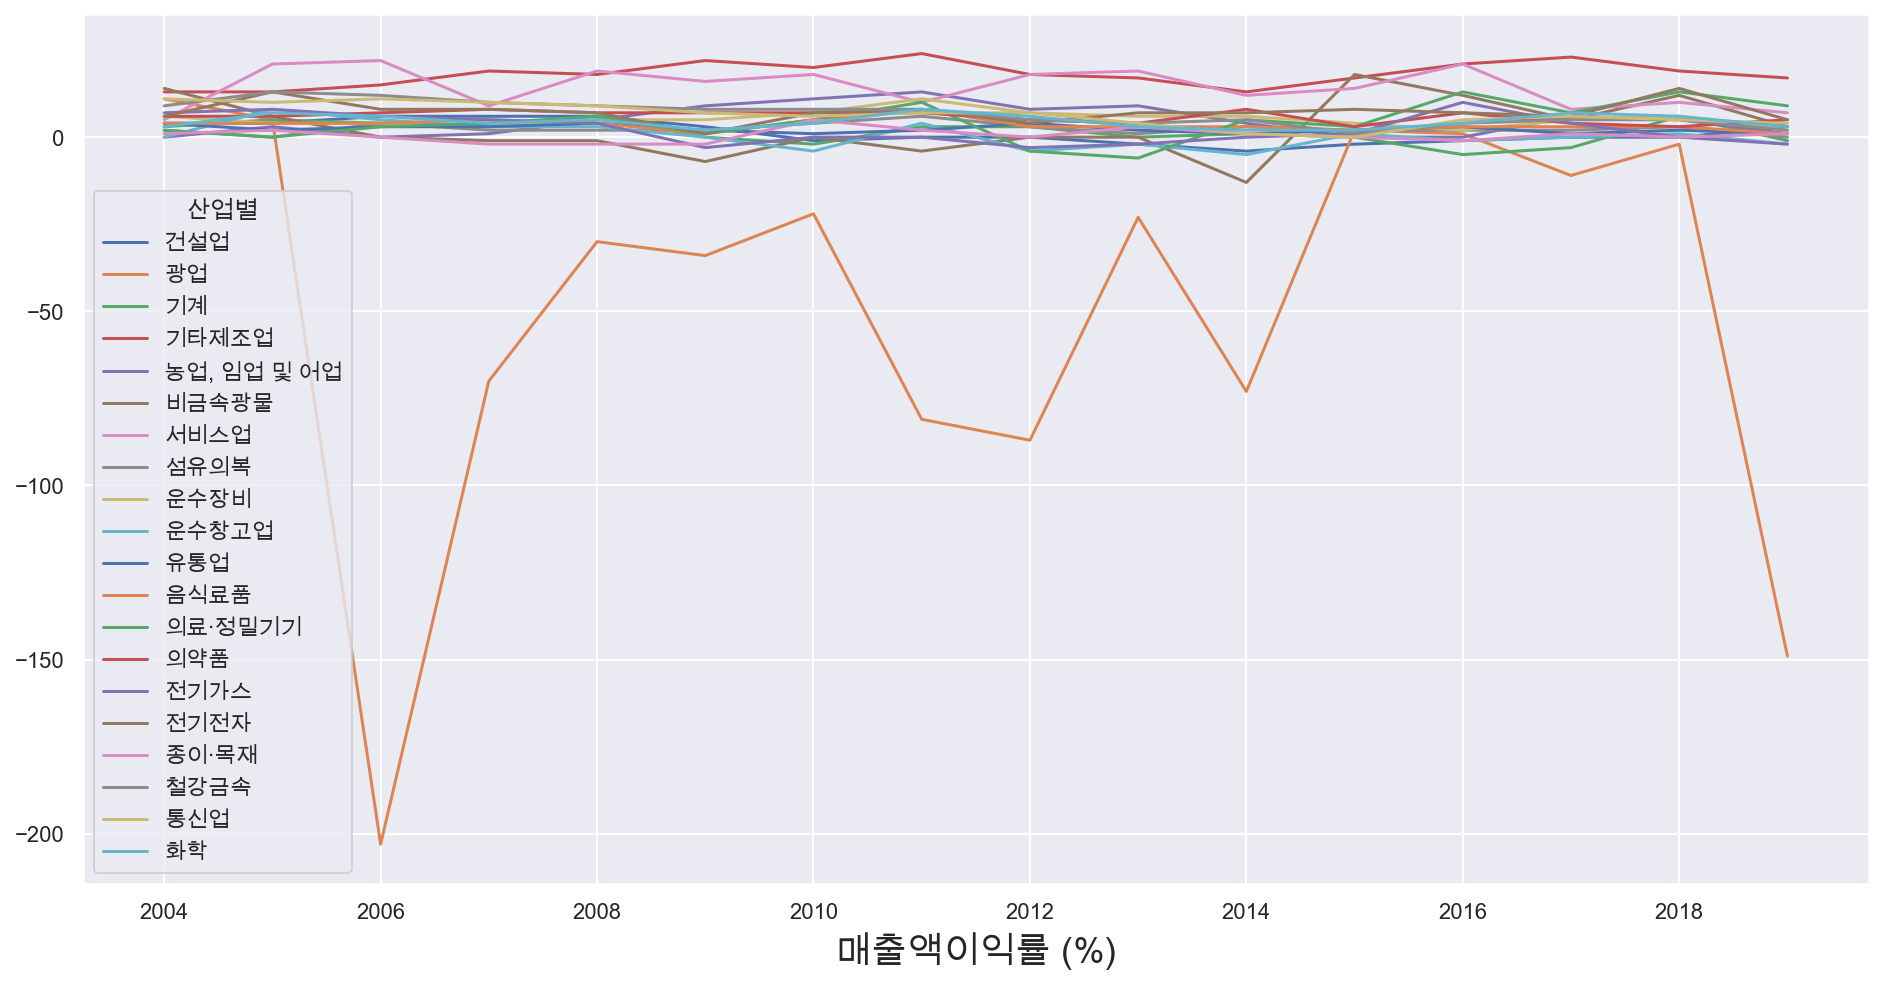

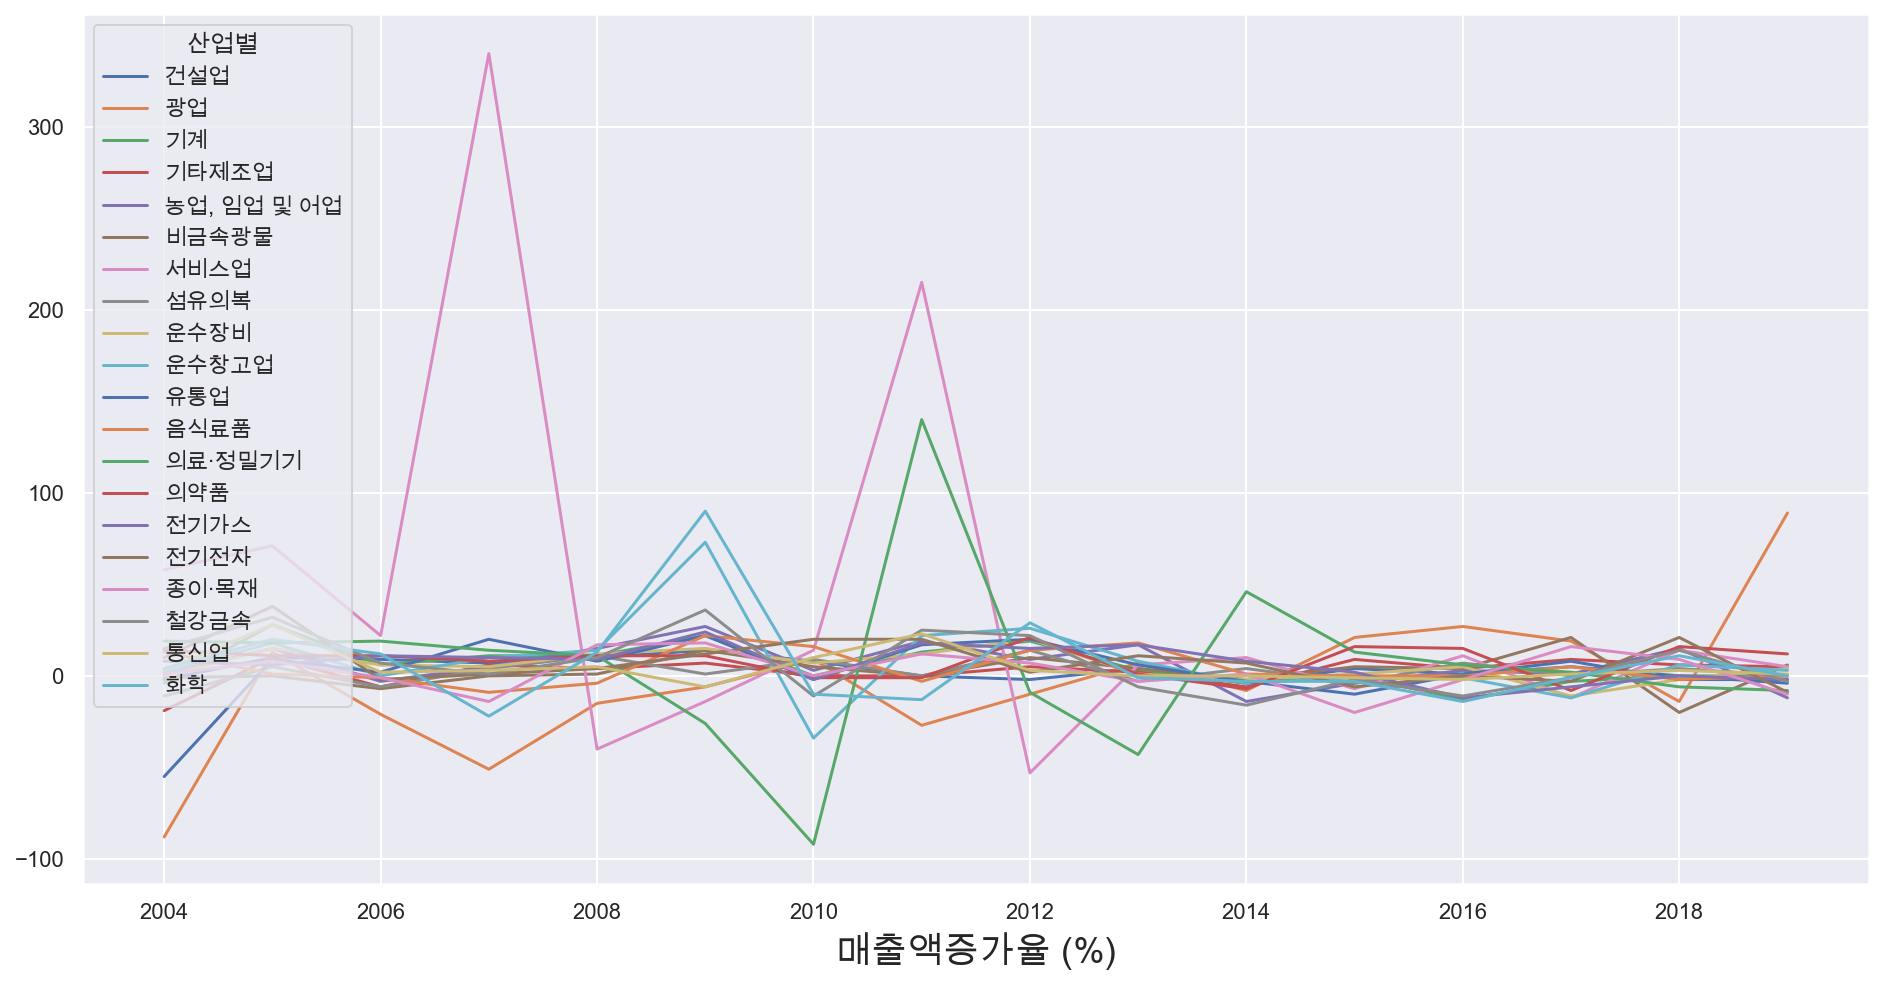

In [188]:
for index in index_list:
    df_count = df.pivot('년도','산업별', index)
    df_count = df_count.drop(columns='전체')
    df_count.plot(figsize=(16,8))
    plt.xlabel(index, fontsize=18);